# SwarmPRM  + Time

In [1]:
%matplotlib inline

## Road Map tests


#### Import and setup

In [2]:
import glob
from matplotlib import pyplot as plt
import numpy as np

from swarm_prm.envs.map import MapLoader
from swarm_prm.envs.instance import Instance
from swarm_prm.solvers.utils.gaussian_utils import GaussianGraphNode
from swarm_prm.solvers.utils.gaussian_prm import GaussianPRM


### Visualizing Maps

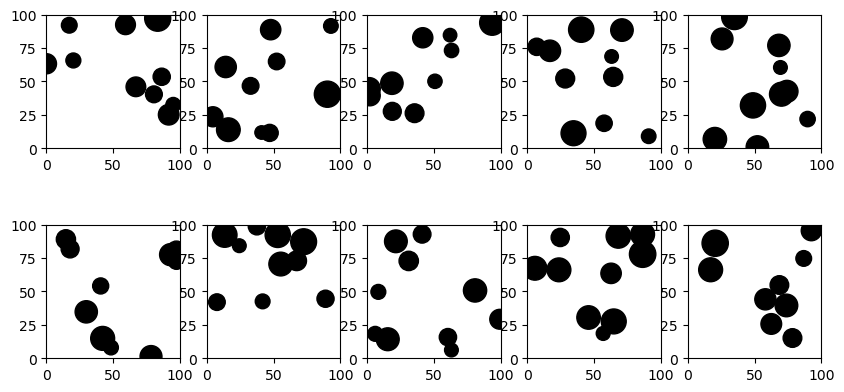

In [3]:
map_dir = "../data/envs/maps/*"

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

# Visualize the first 10 maps
for idx, map_fname in enumerate(glob.glob(map_dir)[:10]):
    row = idx // 5
    col = idx % 5
    map_loader = MapLoader(map_fname)
    map = map_loader.get_map()
    map.visualize(ax=axs[row][col])

### Curated example

(<Figure size 640x480 with 1 Axes>, <Axes: >)

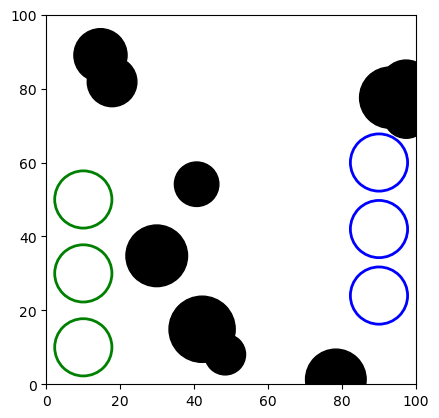

In [4]:
### PARAMETERS ###

# Map config
map_fname = "../data/envs/maps/map_3.yaml"
map_loader = MapLoader(map_fname)
map = map_loader.get_map()
num_samples = 500 # number of sample points

# Agent config
num_agent = 500
agent_radius = 1
# sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
sampling_method = "HEXAGON"
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 30], [10, 50]])
goals = np.array([[90, 42], [90, 60],  [90, 24]])

starts_weight = np.array([0.3, 0.4, 0.3])
goals_weight = np.array([0.1, 0.6, 0.3])

g_starts = [GaussianGraphNode(start, np.identity(2)*10) for start in starts]
g_goals = [GaussianGraphNode(goal, np.identity(2)*10) for goal in goals]

instance = Instance(map, g_starts, g_goals, starts_weight, goals_weight, num_agent)
instance.visualize()



#### Sampling Roadmap



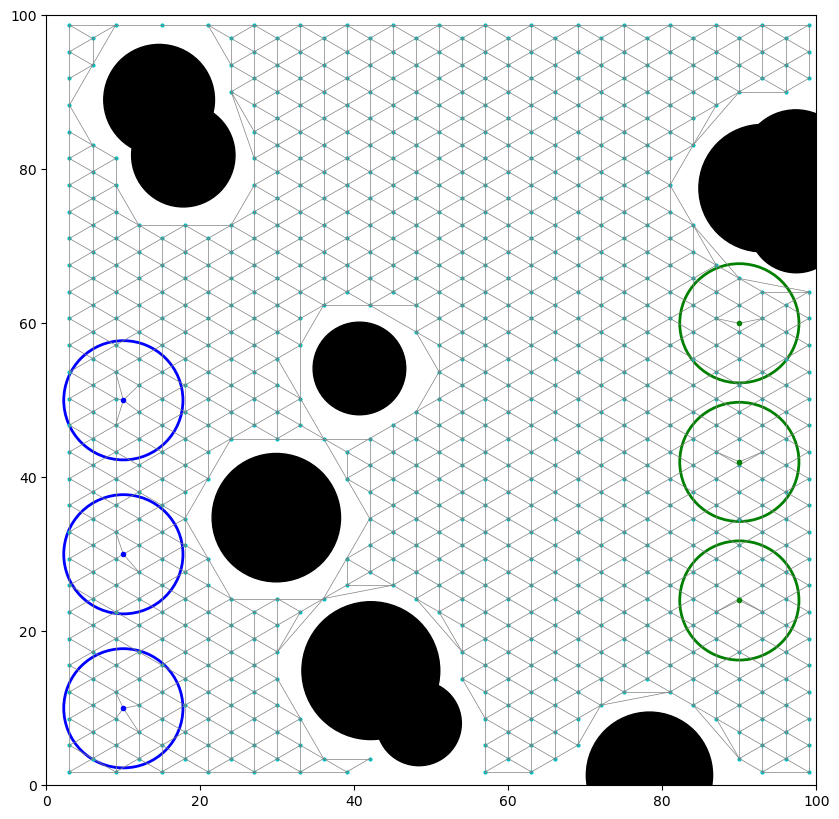

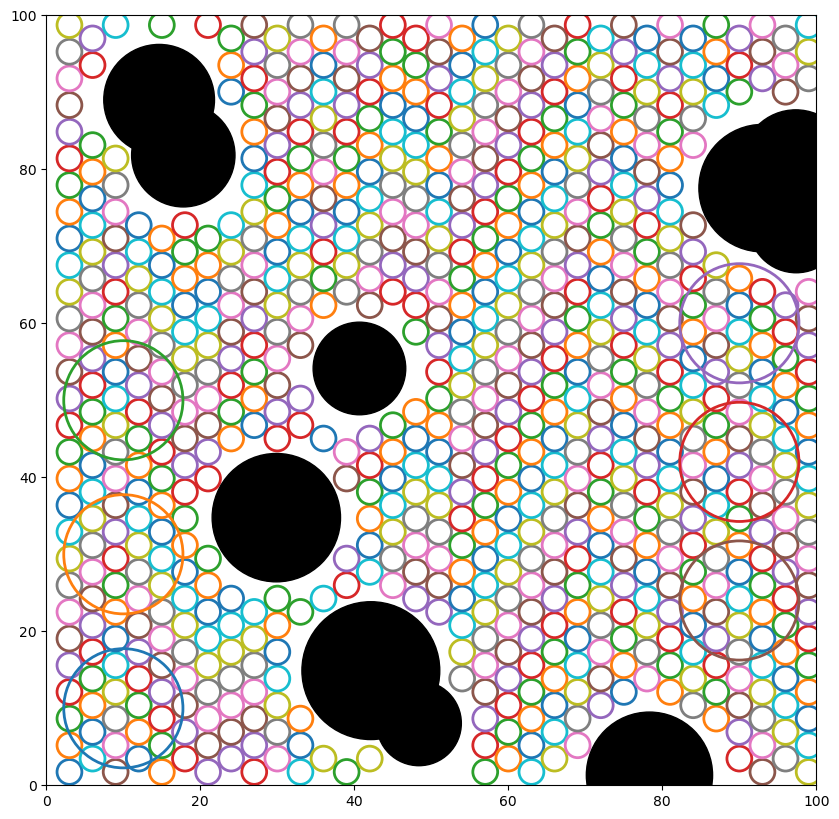

In [5]:
# Swarm PRM sampling method
gaussian_prm = GaussianPRM(instance, num_samples)
gaussian_prm.sample_free_space(sampling_strategy=sampling_method)
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
gaussian_prm.visualize_roadmap("test_map")
gaussian_prm.visualize_g_nodes("test_g_nodes")



### TEG 

In [6]:
from swarm_prm.solvers.macro.teg import TEGGraph

teg_graph= TEGGraph(gaussian_prm, agent_radius, target_flow=num_agent)
max_flow, flow_dict, timestep, teg = teg_graph.get_earliest_timestep()
print("max flow", max_flow)
print("timestep", timestep)
print("flow_dict", flow_dict)
assert max_flow is not None, "Unable to find solution within the given timesteps"


timestep: 22 max_flow: 4
timestep: 23 max_flow: 8
timestep: 24 max_flow: 16
timestep: 25 max_flow: 32
timestep: 26 max_flow: 48
timestep: 27 max_flow: 68
timestep: 28 max_flow: 92
timestep: 29 max_flow: 124
timestep: 30 max_flow: 160
timestep: 31 max_flow: 200
timestep: 32 max_flow: 240
timestep: 33 max_flow: 280
timestep: 34 max_flow: 322
timestep: 35 max_flow: 354
timestep: 36 max_flow: 376
timestep: 37 max_flow: 392
timestep: 38 max_flow: 408
timestep: 39 max_flow: 424
timestep: 40 max_flow: 440
timestep: 41 max_flow: 456
timestep: 42 max_flow: 472
timestep: 43 max_flow: 488
timestep: 44 max_flow: 500
max flow 500
timestep 44
flow_dict defaultdict(<function TEGGraph._residual_to_flow.<locals>.<lambda> at 0x7f1482d69940>, {'SS': {'760_0': 150, '761_0': 200, '762_0': 150}, '760_0': {'760_1': 134, '58_1': 4, '82_1': 4, '57_1': 4, '81_1': 4}, '761_0': {'761_1': 184, '63_1': 4, '64_1': 4, '88_1': 4, '87_1': 4}, '762_0': {'762_1': 130, '69_1': 4, '70_1': 4, '93_1': 4, '68_1': 4, '94_1': 4

In [7]:
# gaussian_prm.visualize_solution(flow_dict, timestep, num_agent)
simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)

In [8]:
# gaussian_prm.animate_solution(flow_dict, timestep, num_agent)

### APF Test

In [ ]:
from swarm_prm.solvers.micro.apf import APFSingleStepSolver
apf_solver = APFSingleStepSolver(map, simple_paths, agent_radius, timestep)
simple_paths = apf_solver.get_solution()

Found solution


ValueError: too many values to unpack (expected 2)